

---


#**A PRODUCT RECOMMENDATION SYSTEM THAT ALLEVIATES THE EFFECT OF COLD START PROBLEM BY INCORPORATING USER WRITTEN REVIEWS**

---



*Cold Start Problem:*


> Cold Start problem is a problem that occurs in recommendation systems when there is no sufficient data to make the prediction. To overcome this, in this project, we shall be using the reviews written by the user to help our further prediction for the new users.





---


##**Importing Libraries**


---



In [481]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [482]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


##**Importing Dataset**


---



In [483]:
df = pd.read_csv('/content/drive/MyDrive/19CSE305: MACHINE LEARNING/SEMESTER PROJECT/UserReviews.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)




---


##**Basic Operations and Observations**


---



In [484]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [485]:
rows, columns = df.shape
print('Rows: ', rows)
print('Columns: ', columns)

Rows:  34660
Columns:  21


In [486]:
df.dtypes

id                       object
name                     object
asins                    object
brand                    object
categories               object
keys                     object
manufacturer             object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
dtype: object

In [487]:
df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [489]:
for col in df.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(df[col].value_counts().head(5))
    print('-' * 40 + '-' * 40)
    print()

----------------------------------------id---------------------------------------- - 

AVphgVaX1cnluZ0-DR74    10966
AVpfl8cLLJeJML43AE3S     6619
AV1YE_muvKc47QAVgpwE     5056
AV1YnRtnglJLPUi8IJmV     3176
AVqkIhwDv8e3D1O-lebb     2814
Name: id, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------name---------------------------------------- - 

Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta                                       10966
Echo (White),,,\r\nEcho (White),,,                                                                            3309
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,     3176
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta                       2814
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                        2527
Name: name, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------asins---------------------------------------- - 

B018Y229OU               10966
B00L9EPT8O,B01E6AO69U     6619
B00U3FPN4U                5056
B00OQVZDJM                3176
B01AHB9CN2                2814
Name: asins, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------brand---------------------------------------- - 

Amazon                          28701
Amazon Fire Tv                   5056
Amazon Echo                       636
Amazon Fire                       256
Amazon Digital Services Inc.       10
Name: brand, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------categories---------------------------------------- - 

Fire Tablets,Tablets,Computers & Tablets,All Tablets,Electronics, Tech Toys, Movies, Music,Electronics,iPad & Tablets,Android Tablets,Frys                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               10966
Stereos,Remote Controls,Amazon Echo,Audio Docks & Mini Speakers,Amazon Echo Accessories,Kitchen & Dining Features,Speaker Systems,Electronics,TVs Entertainment,Clearance,Smart Hubs & Wireless Routers,Featured Brands,Wireless Speakers,Smart Home & Connected Living,H

--------------------------------------------------------------------------------

----------------------------------------keys---------------------------------------- - 

firetablet7displaywifi8gbincludesspecialoffersmagenta/5025800,841667103105,0841667103105,amazon/b018y229ou,firetablet7displaywifi8gbincludesspecialoffersmagenta/b018y229ou                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

--------------------------------------------------------------------------------

----------------------------------------manufacturer---------------------------------------- - 

Amazon                          34639
Amazon Digital Services, Inc       21
Name: manufacturer, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------reviews.date---------------------------------------- - 

2017-01-16T00:00:00.000Z    710
2015-12-28T00:00:00.000Z    671
2017-01-23T00:00:00.000Z    657
2017-01-06T00:00:00.000Z    642
2017-01-18T00:00:00.000Z    627
Name: reviews.date, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------reviews.dateAdded---------------------------------------- - 

2017-09-05T22:09:30Z    3127
2017-09-20T05:35:53Z    1831
2017-09-20T05:35:52Z     800
2017-09-20T05:35:59Z     799
2017-09-20T05:35:54Z     560
Name: reviews.dateAdded, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------reviews.dateSeen---------------------------------------- - 

2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017-09-12T00:00:00Z,2017-08-31T00:00:00Z,2017-08-08T00:00:00Z,2017-08-15T00:00:00Z,2017-08-01T00:00:00Z    5072
2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017-07-08T00:00:00Z,2017-08-06T00:00:00Z,2017-08-19T00:00:00Z     729
2017-04-30T00:18:00.000Z,2017-06-07T08:13:00.000Z                                                                                                      649
2017-09-28T00:00:00Z                                                                                                                                   581
2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017-09-12T00:00:00Z,2017-08-31T00:00:00Z                                                                    507
Name: reviews.dateSeen, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------reviews.didPurchase---------------------------------------- - 

True    1
Name: reviews.didPurchase, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------reviews.doRecommend---------------------------------------- - 

True     32682
False     1384
Name: reviews.doRecommend, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------reviews.id---------------------------------------- - 

111372787.0    1
Name: reviews.id, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------reviews.numHelpful---------------------------------------- - 

0.0    30820
1.0     2049
2.0      562
3.0      190
4.0      122
Name: reviews.numHelpful, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------reviews.rating---------------------------------------- - 

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------reviews.sourceURLs---------------------------------------- - 

https://www.amazon.com/product-reviews/B01J2G4VBG/                      387
http://reviews.bestbuy.com/3545/9439005/reviews.htm?format=embedded      40
http://reviews.bestbuy.com/3545/4370400/reviews.htm?format=embedded      36
http://reviews.bestbuy.com/3545/5442403/reviews.htm?format=embedded      27
https://www.amazon.com/Amazon-Echo-Fire-Power-Adapter/dp/B01J4ORNHU/     16
Name: reviews.sourceURLs, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------reviews.text---------------------------------------- - 

Great for everyday use! Price is right! Easy to setup & use!                                                                                                                  1
Great for reading books onlineI would recommend to friends                                                                                                                    1
It's such s great tablet and the price well you can't beat it. I love Amazon products and have not been disappointed yet!                                                     1
This remote is especially good for those who eyesight is weaker, due to aging. I got it as a gift for someone, and it makes searching for channels easier for the elderly.    1
This was a gift for my daughter and she absolutely loves it.                                                                                                                  1
Name: reviews.text, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------reviews.title---------------------------------------- - 

Great product    645
Great tablet     585
Great            464
Love it          378
Awesome          297
Name: reviews.title, dtype: int64

--------------------------------------------------------------------------------

----------------------------------------reviews.userCity---------------------------------------- - 

Series([], Name: reviews.userCity, dtype: int64)

--------------------------------------------------------------------------------

----------------------------------------reviews.userProvince---------------------------------------- - 

Series([], Name: reviews.userProvince, dtype: int64)

--------------------------------------------------------------------------------

----------------------------------------reviews.username---------------------------------------- - 

Mike     138
Chris     93
John      85
Dave      70
Bill      58
Name: reviews.username, dtype: int64

--------------------------------------------------------------------------------



In [490]:
df['userReview'] = df['reviews.title'] + " " + df['reviews.text']

In [491]:
deleteColumns = ['keys', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
                 'reviews.id', 'reviews.sourceURLs', 'reviews.title', 'reviews.text', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'manufacturer', 'asins']
df.drop(columns = deleteColumns, inplace=True)

In [492]:
df.rename(columns = {'reviews.doRecommend' : 'doRecommend', 'reviews.numHelpful' : 'numHelpful', 'reviews.rating' : 'rating'}, inplace = True)

In [493]:
#Reordering dependent column(doRecommend) to last column
df = df[['id', 'name', 'categories',
       'numHelpful', 'rating',
       'userReview', 'doRecommend']]

In [494]:
df.head()

,id,name,categories,numHelpful,rating,userReview,doRecommend
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",0.0,5.0,Kindle This product so far has not disappointe...,True
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",0.0,5.0,very fast great for beginner or experienced pe...,True
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",0.0,5.0,Beginner tablet for our 9 year old son. Inexpe...,True
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",0.0,4.0,Good!!! I've had my Fire HD 8 two weeks now an...,True
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",0.0,5.0,Fantastic Tablet for kids I bought this for my...,True





---


##**Handling Null values**


---



In [495]:
df.isnull().sum()

id                0
name           6760
categories        0
numHelpful      529
rating           33
userReview        6
doRecommend     594
dtype: int64

In [496]:
modeFill = df['numHelpful'].mode()
df['numHelpful'] = df['numHelpful'].fillna(modeFill[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [497]:
df['rating'].fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [498]:
df['userReview'].astype(str)
df['userReview'] = df.apply(lambda row: ("Good" if row['rating'] > 3 else ("Average" if row['rating'] == 3 else "Bad")) if pd.isnull(row['userReview']) else row['userReview'], axis = 1)

In [499]:
# if 'doRecommend' is NULL, we can use it for testing
df_test = df[df['doRecommend'].isnull()]
df_test = df_test[df_test['name'].notna()]
df_test.reset_index(inplace = True)

df = df[df['doRecommend'].notnull()]
df = df[df['name'].notna()]
df.reset_index(inplace = True)
rows, columns = df.shape

In [500]:
df.isnull().sum()

index          0
id             0
name           0
categories     0
numHelpful     0
rating         0
userReview     0
doRecommend    0
dtype: int64



---


## **Natural Language Processing**


---



###Importing Required NLP Libraries

In [501]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import collections
from collections import Counter
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer, PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###Pre-Processing the User Reviews

In [502]:
df['userReview'].head()

0    Kindle This product so far has not disappointe...
1    very fast great for beginner or experienced pe...
2    Beginner tablet for our 9 year old son. Inexpe...
3    Good!!! I've had my Fire HD 8 two weeks now an...
4    Fantastic Tablet for kids I bought this for my...
Name: userReview, dtype: object

In [503]:
cleanReview = []
all_stopwords = stopwords.words('english')              #Preparing a list of 'No Weight' words (eg. is, was, pronouns, etc...)
all_stopwords.remove('not')                             
# ps = PorterStemmer()
# wnl = WordNetLemmatizer()

for i in range(0, rows):
  if(df['userReview'][i] == np.nan):
    print(i)
    break
  review = re.sub('[^a-zA-Z]', ' ', df['userReview'][i])  #Replacing all the punctuation with ' '(space)  
  review = review.lower()                                 #Converting the review into lower case
  review = review.split()                                 #Splitting them into list for better processing

  # for i in range(0, len(review)):
    # review[i] = ps.stem(review[i])                        # Stemming the words. ie. removes plural, -ing etc.
    # review[i] = wnl.lemmatize(review[i])                  # Lemmatization grouping synonymous words together

  temp = []
  for word in review:                                     #Removing all the 'No weight' stopwords from the review
    if word not in all_stopwords:
      temp.append(word)

  temp = ' '.join(temp)                               #Joining the final processed review string
  cleanReview.append(temp)
df['userReview'] = cleanReview

In [504]:
df['userReview'].head()

0    kindle product far not disappointed children l...
1    fast great beginner experienced person bought ...
2    beginner tablet year old son inexpensive table...
3    good fire hd two weeks love tablet great value...
4    fantastic tablet kids bought grand daughter co...
Name: userReview, dtype: object

In [505]:
df['sentimentScore'] = df['userReview'].apply(lambda x: TextBlob(x).sentiment)

In [506]:
polarity = []
subjectivity = []
for i in df.sentimentScore:
  polarity.append(round(i[0], 4))
  subjectivity.append(round(i[1], 4))
df['polarity'] = polarity
df['subjectivity'] = subjectivity

**Polarity**: Range[-1, 1] Helps in classifying positive, neutral, negative emotions in reviews.

**Subjectivity**: Range[0, 1] Describes how much the review is shifted towards the given emotion.

In [507]:
df['sentimentType'] = ''
df.loc[df.polarity > 0, 'sentimentType'] = 'POSITIVE'
df.loc[df.polarity == 0, 'sentimentType'] = 'NEUTRAL'
df.loc[df.polarity < 0, 'sentimentType'] = 'NEGATIVE'

In [508]:
df.head()

,index,id,name,categories,numHelpful,rating,userReview,doRecommend,sentimentScore,polarity,subjectivity,sentimentType
0,0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",0.0,5.0,kindle product far not disappointed children l...,True,"(0.325, 0.7833333333333333)",0.3250,0.7833,POSITIVE
1,1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",0.0,5.0,fast great beginner experienced person bought ...,True,"(0.6, 0.75)",0.6000,0.7500,POSITIVE
2,2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",0.0,5.0,beginner tablet year old son inexpensive table...,True,"(0.35, 0.44999999999999996)",0.3500,0.4500,POSITIVE
3,3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",0.0,4.0,good fire hd two weeks love tablet great value...,True,"(0.4052083333333334, 0.6937500000000001)",0.4052,0.6938,POSITIVE
4,4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",0.0,5.0,fantastic tablet kids bought grand daughter co...,True,"(0.3875, 0.6351473922902493)",0.3875,0.6351,POSITIVE


In [509]:
df.describe()

,index,numHelpful,rating,polarity,subjectivity
count,27409.000000,27409.000000,27409.000000,27409.000000,27409.000000
mean,14103.950819,0.270787,4.567587,0.446024,0.605578
std,8007.566175,2.166219,0.733971,0.231186,0.169228
min,0.000000,0.000000,1.000000,-1.000000,0.000000
25%,7282.000000,0.000000,4.000000,0.300000,0.506700
50%,14134.000000,0.000000,5.000000,0.450000,0.610000
75%,21000.000000,0.000000,5.000000,0.600000,0.722200
max,27899.000000,109.000000,5.000000,1.000000,1.000000




---


##**Visualizations**


---


In [510]:
# plt.figure(figsize = (7, 7))
# ax = sns.heatmap(df.corr(), annot=True);
# ax.set_title('Correlation between numeric columns');

**Inference**: Correlation's range is [-1, 1]. The value closer to 0 imply low correlation and closer to -1 and 1 imply higher correlation (negative and positive direction respectively).

---

In [511]:
# plt.figure(figsize = (7, 7));
# ax = sns.countplot(x = df['rating']);
# ax.set_yscale("log")
# ax.set_title('Frequency of Ratings');
# for p in ax.patches:
#     ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

**Inference**: We can understand the frequencies of the ratings [0 - 5].


---



In [512]:
# plt.figure(figsize = (15, 7));
# ax = sns.countplot(x = df['brand'], hue = df.doRecommend);
# ax.set_yscale("log")
# ax.set_title('Brandwise distribution');
# for p in ax.patches:
#     ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

**Inference**: Brand wise distribution based on recommendation


---



In [513]:
# plt.figure(figsize = (8, 8))

# labels = ['GOOD', 'BAD']
# colors = ['#189AB4', '#D4F1F4']
# plt.pie(df['doRecommend'].value_counts(), autopct='%0.2f%%',colors=colors)

# plt.title('Actual Recommendation%', size=14)
# plt.legend(labels, loc='upper right')
# plt.show()

**Inference**: We can see the % distribution of Good and Bad recommendation.


---



In [514]:
# plt.figure(figsize = (7, 7));
# ax = sns.countplot(x = df['sentimentType']);
# ax.set_yscale("log")
# ax.set_title('Frequency of sentimentType');
# for p in ax.patches:
#     ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

**Inference**: Frequency of sentiment type which we calculated based on polarity.


---



In [515]:
# temp=[]
# temp = [w for s in df['userReview'].str.split().values.tolist() for w in s]

# counter = collections.Counter(temp)
# most_common_words = counter.most_common()

# x, y = [], []
# for word,count in most_common_words[:20]:
#     x.append(word)
#     y.append(count)

# fig, axis = plt.subplots(ncols = 1, nrows = 1, figsize = (8, 8), dpi = 100)
# sns.barplot(x = y, y = x)
# plt.title('Overall Frequency of words')
# plt.show()

Inference: Frequency of most frequently occuring words


---



In [516]:
# temp_df = df[(df['subjectivity'] > 0.5) & (df['polarity'] < 0)]
# temp = []
# temp = [w for s in temp_df['userReview'].str.split().values.tolist() for w in s]

# counter = collections.Counter(temp)
# most_common_words = counter.most_common()
# x, y = [], []
# for word,count in most_common_words[:20]:
#     x.append(word)
#     y.append(count)

# fig, axis = plt.subplots(ncols = 1, nrows = 1, figsize = (8, 8), dpi = 100)
# sns.barplot(x = y, y = x)
# plt.title('Frequency of words in negative reviews')
# plt.show()

**Inference**: Frequency of most frequently occuring words in negative reviews.


---



In [517]:
# temp_df = df[(df['subjectivity'] > 0.5) & (df['polarity'] > 0)]
# temp = []
# temp = [w for s in temp_df['userReview'].str.split().values.tolist() for w in s]

# counter = collections.Counter(temp)
# most_common_words = counter.most_common()
# x, y = [], []
# for word,count in most_common_words[:20]:
#     x.append(word)
#     y.append(count)

# fig, axis = plt.subplots(ncols = 1, nrows = 1, figsize = (8, 8), dpi = 100)
# sns.barplot(x = y, y = x)
# plt.title('Frequency of words in positive reviews')
# plt.show()

Inference: Frequency of most frequently occuring words in positive reviews.


---



In [518]:
# ax = sns.pairplot(df, x_vars=["polarity"], y_vars=["subjectivity"], hue = 'doRecommend', kind = 'reg', height = 7, palette = 'Set1');
# ax.fig.suptitle('Relation between polarity and subjectivity');

**Inference**: From the line, we can see that increase in polarity and subjectivity correspond to increase in likelihood of recommendation.


---





---


##**Model Building**


---


In [519]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

In [520]:
df['doRecommend'] = df['doRecommend'].map({True: 1, False: 0})
tfidf = TfidfVectorizer(max_features = 80, stop_words='english') # = TF*idf, tf = term frequency, idf = log (N / ni)
X = tfidf.fit_transform(df['userReview']).toarray()
X_unlabelled = tfidf.fit_transform(df_test['userReview']).toarray()
y = df['doRecommend']

In [521]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



---


###**Supervised ML Models**



1.   Logistic Regression
2.   k - Nearest Neighbors Classifier
3.   Naive-Bayes Classifier
4.   Decision Tree Classifier
5.   Support Vector Classifier
6.   Random Forest Classifier
7.   AdaBoost Classifier


---


---
###Logistic Regression
---



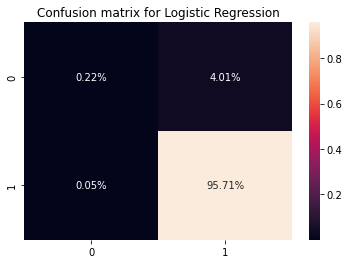

In [522]:
LR = LogisticRegression();
LR.fit(X_train, y_train)
y_LR_pred = LR.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_LR_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
ax.set_title('Confusion matrix for Logistic Regression');

---
###K Nearest Neighbour
---

In [523]:
K = 0
maxAcc = 0
xaxis = []
yaxis = []
for i in range(5, 25, 2):
    KNC = KNeighborsClassifier(n_neighbors = i);
    KNC.fit(X_train, y_train)
    y_KN_pred = KNC.predict(X_test)
    temp = accuracy_score(y_KN_pred, y_test)
    if(maxAcc < temp):
        K = i
        maxAcc = temp
    xaxis.append(i)
    yaxis.append((1 - temp))
print('Value of k chosen = ', K)

Value of k chosen =  13


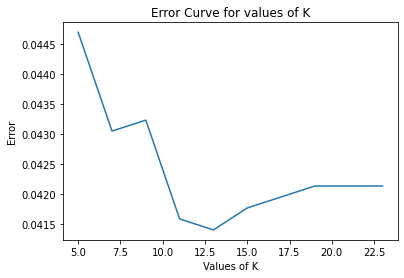

In [524]:
ax = sns.lineplot(x = xaxis, y = yaxis);
ax.set_ylabel('Error')
ax.set_xlabel('Values of K')
ax.set_title('Error Curve for values of K');

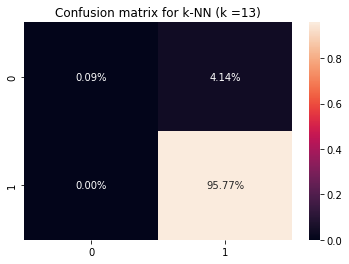

In [525]:
KNC = KNeighborsClassifier(n_neighbors = K);
KNC.fit(X_train, y_train)
y_KN_pred = KNC.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_KN_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt= '0.2%');
title = 'Confusion matrix for k-NN (k =' +  str(K)  + ')'
ax.set_title(title);

---
###Naive-Bayes Classifier
---



array([  25,  207,   32, 5218])

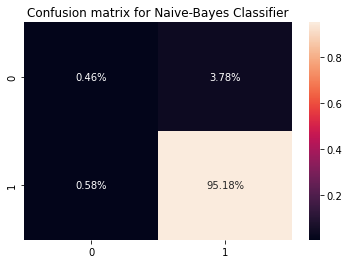

In [526]:
BNB = BernoulliNB();
BNB.fit(X_train, y_train)
y_NB_pred = BNB.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_NB_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%');
ax.set_title('Confusion matrix for Naive-Bayes Classifier');
cf_matrix.ravel()

---
###Decision Tree Classifier
---

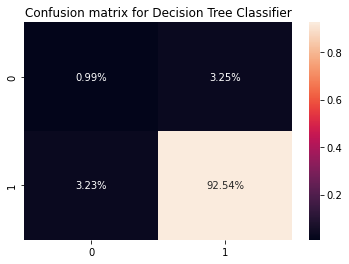

In [527]:
DTC = DecisionTreeClassifier(criterion = 'entropy');
DTC.fit(X_train, y_train)
y_DTC_pred = DTC.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_DTC_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
ax.set_title('Confusion matrix for Decision Tree Classifier');

---
###Support Vector Classifier
---

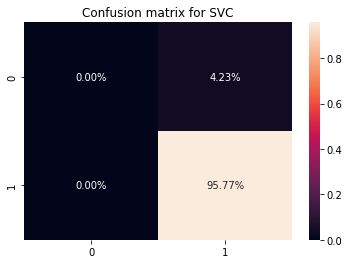

In [528]:
SV = SVC();
SV.fit(X_train, y_train)
y_SV_pred = SV.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_SV_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True,fmt= '0.2%');
ax.set_title('Confusion matrix for SVC');



---


###*Ensemble Algorithms*


---

---
###Random Forest Classifier
---

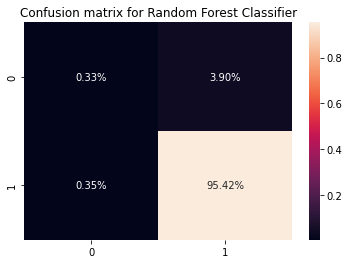

In [529]:
RFC = RandomForestClassifier(criterion = "entropy");
RFC.fit(X_train, y_train)
y_RF_pred = RFC.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_RF_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%');
ax.set_title('Confusion matrix for Random Forest Classifier');

---
###AdaBoosting Classifier
---

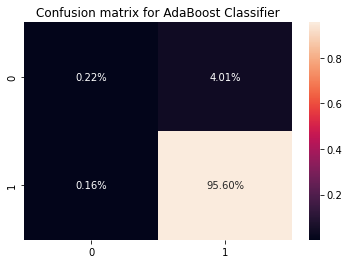

In [530]:
ABC = AdaBoostClassifier();
ABC.fit(X_train, y_train)
y_AB_pred = ABC.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_AB_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True,fmt= '0.2%');
ax.set_title('Confusion matrix for AdaBoost Classifier');

In [531]:
models = ['Logistic Regression', 'k-NN', 'Naive Bayes', 'Decision Tree', 'Support Vector Classifier', 'Random Forest', 'AdaBoost Classifier']

In [532]:
acc = []
pre = []
rec = []
f1 = []
def comparison(y_true, y_pred):
  acc.append(round(accuracy_score(y_true, y_pred)*100, 3))
  temp = precision_recall_fscore_support(y_true, y_pred, average = 'binary')
  pre.append(temp[0])
  rec.append(temp[1])
  f1.append(temp[2])

comparison(y_test, y_LR_pred)
comparison(y_test, y_KN_pred)
comparison(y_test, y_NB_pred)
comparison(y_test, y_DTC_pred)
comparison(y_test, y_SV_pred)
comparison(y_test, y_RF_pred)
comparison(y_test, y_AB_pred)

In [533]:
comp_table = pd.DataFrame({'Models': models, 'Accuracy(%)': acc, 'Precision': pre, 'Recall': rec, 'F1-score': f1})
comp_table.set_index('Models', inplace = True)
comp_table

,Accuracy(%),Precision,Recall,F1-score
Models,,,,
Logistic Regression,95.932,0.959759,0.999429,0.979192
k-NN,95.859,0.958554,1.000000,0.978838
Naive Bayes,95.640,0.961843,0.993905,0.977611
Decision Tree,93.524,0.966102,0.966286,0.966194
Support Vector Classifier,95.768,0.957680,1.000000,0.978382
Random Forest,95.750,0.960698,0.996381,0.978214
AdaBoost Classifier,95.823,0.959714,0.998286,0.978620




---


###**Unsupervised ML Models**


1.   K-Means Clustering
2.   Agglomerative Clustering




---



---
###K-Means Clustering
---

In [534]:
KM = KMeans(n_clusters = 2, random_state = 0);
KM.fit(X)
y_KM_pred = KM.predict(X_unlabelled)

In [535]:
if(np.count_nonzero(y_KM_pred == 1) < np.count_nonzero(y_KM_pred == 0)):
    y_KM_pred = 1 - y_KM_pred

In [536]:
AC = AgglomerativeClustering(n_clusters = 2, linkage='average')
y_AC_pred = AC.fit_predict(X_unlabelled)

In [537]:
if(np.count_nonzero(y_AC_pred == 1) < np.count_nonzero(y_AC_pred == 0)):
    y_AC_pred = 1 - y_AC_pred

In [538]:
y_LR_test = LR.predict(X_unlabelled)
y_KN_test = KNC.predict(X_unlabelled)
y_NB_test = BNB.predict(X_unlabelled)
y_DTC_test = DTC.predict(X_unlabelled)
y_SV_test = SV.predict(X_unlabelled)
y_RF_test = RFC.predict(X_unlabelled)
y_AB_test = ABC.predict(X_unlabelled)

In [539]:
sim_KM = []
sim_AC = []
sim_KM_PC = []
def similar(a, b, c):
  if(c == 0):
    sim_KM.append(round(((a == b).sum()) / len(a)*100, 3))
  elif(c == 1):
    sim_AC.append(round(((a == b).sum()) / len(a)*100, 3))
  elif(c == 2):
    sim_KM_PC.append(round(((a == b).sum()) / len(a)*100, 3))
    
similar(y_KM_pred, y_LR_test, 0)
similar(y_KM_pred, y_KN_test, 0)
similar(y_KM_pred, y_NB_test, 0)
similar(y_KM_pred, y_DTC_test, 0)
similar(y_KM_pred, y_SV_test, 0)
similar(y_KM_pred, y_RF_test, 0)
similar(y_KM_pred, y_AB_test, 0)
similar(y_AC_pred, y_LR_test, 1)
similar(y_AC_pred, y_KN_test, 1)
similar(y_AC_pred, y_NB_test, 1)
similar(y_AC_pred, y_DTC_test, 1)
similar(y_AC_pred, y_SV_test, 1)
similar(y_AC_pred, y_RF_test, 1)
similar(y_AC_pred, y_AB_test, 1)

In [540]:
comp_table = pd.DataFrame({'Models': models, 'K-means(similar %)': sim_KM, 'Agg. Clustering(similar %)': sim_AC})
comp_table.set_index('Models', inplace = True)



---


*Comparing unsupervised with supervised models*


---

In [541]:
comp_table

,K-means(similar %),Agg. Clustering(similar %)
Models,,
Logistic Regression,97.352,98.167
k-NN,97.352,98.167
Naive Bayes,96.945,97.760
Decision Tree,79.022,79.022
Support Vector Classifier,97.760,98.574
Random Forest,85.743,86.965
AdaBoost Classifier,97.760,98.574




---


*Perfoming PCA to reduce dimensions*


---

In [542]:
from sklearn.decomposition import PCA

In [543]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X_unlabelled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [544]:
KM_PC = KMeans(n_clusters = 2, random_state = 0);
KM_PC.fit(principalDf)
labels = KM_PC.labels_

In [545]:
finalDf = pd.concat([principalDf, pd.DataFrame(KM_PC.labels_)], axis = 1)
finalDf.columns = ['PC1', 'PC2', 'target']
if(np.count_nonzero(labels == 1) < np.count_nonzero(labels == 0)):
    finalDf['target'] = 1 - finalDf['target']
KM_PC_pred = finalDf['target']

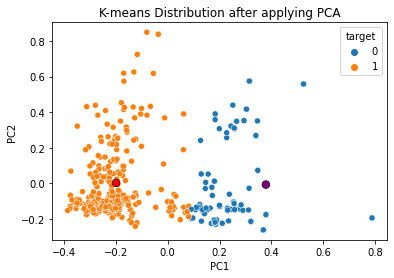

In [546]:
ax = sns.scatterplot(x = finalDf['PC1'], y = finalDf['PC2'], hue = finalDf['target'])
sns.scatterplot(x = KM_PC.cluster_centers_[:, 0], y = KM_PC.cluster_centers_[:, 1], s = 60, ec = 'black', palette = ['purple', 'red'], hue=range(2), legend = False)
ax.set_title('K-means Distribution after applying PCA');

In [547]:
similar(KM_PC_pred, y_LR_test, 2)
similar(KM_PC_pred, y_KN_test, 2)
similar(KM_PC_pred, y_NB_test, 2)
similar(KM_PC_pred, y_DTC_test,2)
similar(KM_PC_pred, y_SV_test, 2)
similar(KM_PC_pred, y_RF_test, 2)
similar(KM_PC_pred, y_AB_test, 2)

In [548]:
comp_table = pd.DataFrame({'Models': models, 'K-means with PCA (similar%)': sim_KM_PC})
comp_table.set_index('Models', inplace = True)

In [549]:
comp_table

,K-means with PCA (similar%)
Models,
Logistic Regression,65.580
k-NN,65.173
Naive Bayes,65.173
Decision Tree,68.432
Support Vector Classifier,65.580
Random Forest,70.672
AdaBoost Classifier,65.580


In [550]:
df_test['doRecommend'] = y_LR_test

In [551]:
df_test = df_test[['name', 'doRecommend']]

In [552]:
df_test = df_test.groupby('name', as_index=False)['doRecommend'].mean()

In [553]:
df_test.sort_values(by = 'doRecommend', ascending = False)

,name,doRecommend
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",1.000000
3,"Amazon Kindle Fire Hd (3rd Generation) 8gb,,,\...",1.000000
4,"Amazon Kindle Lighted Leather Cover,,,\r\nAmaz...",1.000000
5,"Amazon Kindle Lighted Leather Cover,,,\r\nKind...",1.000000
6,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,1.000000
7,"Echo (White),,,\r\nEcho (White),,,",1.000000
8,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",1.000000
9,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",1.000000
10,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",1.000000
11,"Kindle Keyboard,,,\r\nKindle Keyboard,,,",1.000000
